### 1. Predicción del rendimiento académico según horas de estudio

Numerosos estudios han demostrado que existe una relación positiva entre la cantidad de horas de estudio y el rendimiento académico (nota final). Aunque influyen otros factores, la regresión lineal puede modelar esta relación básica de manera efectiva.

### Importación de dependencias 

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.model_selection import train_test_split

### Crear nuestro dataframe

In [15]:
train = pd.read_csv("StudentsPerformance.csv")
train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Revisión de datos

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [17]:
train.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Crear columna de promedio de notas

In [18]:
train['average_score'] = train[['math score', 'reading score', 'writing score']].mean(axis=1)
train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### Dividir en entrenamiento y prueba

In [22]:
train, test = train_test_split(train, test_size=0.2, random_state=42)

### Simular horas de estudio (aleatorio, correlacionado con promedio)

In [24]:
np.random.seed(42)
train['study_hours'] = (train['average_score'] / 20) + np.random.normal(0, 1, len(train))
test['study_hours'] = (test['average_score'] / 20) + np.random.normal(0, 1, len(test))

### Crear el modelo de regresión

In [25]:
modelo = LinearRegression()

### Entrenar el modelo con los datos horas de estudio como x y como y sera puntuación media

In [26]:
modelo.fit(train[['study_hours']], train[['average_score']])

LinearRegression()

### Predicción

In [27]:
modelo.predict(test[["study_hours"]])

array([[80.95339988],
       [63.31609892],
       [71.18663542],
       [67.29213657],
       [69.85057069],
       [69.45771464],
       [69.44398421],
       [61.87560378],
       [79.8301389 ],
       [55.56025993],
       [59.78890143],
       [50.9655432 ],
       [80.67366368],
       [66.22321934],
       [80.45830438],
       [60.47501202],
       [63.54022823],
       [67.53078857],
       [63.75626733],
       [73.12369184],
       [66.46808395],
       [71.38908209],
       [81.92825694],
       [57.58135483],
       [68.98593077],
       [81.16853791],
       [80.21717162],
       [58.52933181],
       [56.17712968],
       [62.08078658],
       [56.35142374],
       [61.60536639],
       [58.76897602],
       [64.6586887 ],
       [71.09088185],
       [63.99508633],
       [81.37475011],
       [63.54877732],
       [77.20180559],
       [46.73788056],
       [71.21653861],
       [71.49386351],
       [59.65898353],
       [68.49773083],
       [74.71047733],
       [70

### Guardar el modelo 

In [28]:
joblib.dump(modelo, "modelo_regresion.pkl")


['modelo_regresion.pkl']

### Cargar el modelo

In [29]:
reg = joblib.load("modelo_regresion.pkl")

### Ahora calculamos el error cuadratico medio.

In [30]:
from sklearn.metrics import mean_squared_error

Evaluar el modelo con el conjunto de entrenamiento 

In [33]:
y_predig = modelo.predict(train[["study_hours"]])
mse = mean_squared_error(train["average_score"], y_predig)
print("Error cuadratico medio", mse)


Error cuadratico medio 132.98568081957782


### Graficar los datos para visualizar la recta

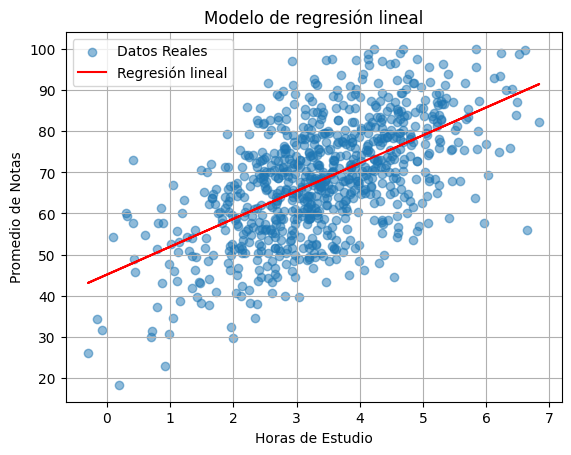

In [34]:
plt.scatter(train["study_hours"], train["average_score"], label="Datos Reales", alpha=0.5)
plt.plot(train["study_hours"], y_predig, color="red", label="Regresión lineal")
plt.xlabel("Horas de Estudio")
plt.ylabel("Promedio de Notas")
plt.title("Modelo de regresión lineal")
plt.grid()
plt.legend()
plt.show()